# Análisis de Tarifas y Comportamiento del Cliente en Planes Prepago

# Introducción

La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Se realizara un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Se analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
df_user = pd.read_csv("/datasets/megaline_users.csv")
df_calls = pd.read_csv("/datasets/megaline_calls.csv")
df_messages = pd.read_csv("/datasets/megaline_messages.csv")
df_internet = pd.read_csv("/datasets/megaline_internet.csv")
df_plans = pd.read_csv("/datasets/megaline_plans.csv")

## Preparar los datos

In [3]:
print(df_user.info())
print(df_user.head())
print()
print(df_calls.info())
print(df_calls.head())
print()
print(df_messages.info())
print(df_messages.head())
print()
print(df_internet.info())
print(df_internet.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40   

## Tarifas

In [4]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [5]:
# Imprime una muestra de los datos para las tarifas
df_plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [6]:
df_plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


Descripción de hallazgos:

En general solo contiene 2 filas con 8 columnas, de tipo entero y flotente y solo una de tipo object, todos los tipos de datos parecen ser adecuados para las columnas, al tener 2 filas, No se observan valores nulos ni datos duplicados.

## Corregir datos

Por protocolo se van a cambiar todas las letras a minúsculas para revisar que no exista ningun duplicado

In [7]:
# Se cambia a minúsculas y se buscan duplicados
df_plans["plan_name"] = df_plans["plan_name"].str.strip().str.lower()
df_plans.drop_duplicates(inplace=True)

print(df_plans.info())
print(df_plans.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 144.0+ bytes
None
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10      

## Enriquecer los datos


Se calcula el costo extra por mensaje, por minuto y por megabytes.

In [8]:
# Costo por mensaje extra
df_plans["cost_per_extra_message"] = df_plans["usd_per_message"] * df_plans["messages_included"]

# Costo por minuto adicional
df_plans["cost_per_extra_minute"] = df_plans["usd_per_minute"] * df_plans["minutes_included"]

# Costo por MB adicional
df_plans["cost_per_extra_mb"] = df_plans["usd_per_gb"] * df_plans["mb_per_month_included"]

print(df_plans)


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   cost_per_extra_message  cost_per_extra_minute  cost_per_extra_mb  
0                     1.5                   15.0             153600  
1                    10.0                   30.0             215040  


## Usuarios/as

In [9]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_user.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [10]:
# Imprime una muestra de datos para usuarios
df_user.sample(10)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
462,1462,Lesley,Workman,20,"Las Vegas-Henderson-Paradise, NV MSA",2018-09-05,ultimate,NaN
45,1045,Barney,Ortega,20,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-10-15,surf,NaN
373,1373,Lindsey,Dickerson,21,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-08-30,ultimate,NaN
393,1393,Wilfredo,Rosa,44,"Knoxville, TN MSA",2018-10-29,surf,NaN
95,1095,Lilliam,Alvarado,55,"Louisville/Jefferson County, KY-IN MSA",2018-04-21,surf,NaN
152,1152,Merrill,Hogan,35,"Orlando-Kissimmee-Sanford, FL MSA",2018-11-01,surf,NaN
275,1275,Elvie,Velazquez,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-29,ultimate,NaN
392,1392,Gale,Mcfadden,34,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-24,surf,NaN
354,1354,Leonel,Dyer,41,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-24,ultimate,NaN
101,1101,Sage,Conley,27,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-02-08,surf,NaN


Descripción de hallazgos:

Los datos contiene mayúsculas y minúsculas, se van a cambiar a minúsculas las columnas "first_name" y "last_name" con .str.lower().

La columna "reg_date" y "churn_date" son de tipo objects, se van a modificar a tipo datetime.

Contiene muchos datos ausentes pero es normal, ya que nos comentaron que mientas los usuarios estan activos se coloca NaN.

Se busca que no existan duplicados.


### Corregir los datos

In [11]:
#Cambiar nombre y apellido a minusculas
df_user["first_name"] = df_user["first_name"].str.lower()
df_user["last_name"] = df_user["last_name"].str.lower()

#Cambiar fecha de formato object a datetime
df_user["reg_date"] = pd.to_datetime(df_user["reg_date"])
df_user["churn_date"] = pd.to_datetime(df_user["churn_date"])

#eliminamos duplicados
df_user.drop_duplicates(inplace = True)

print(df_user.info())
print(df_user.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 35.2+ KB
None
   user_id first_name  last_name  age                                   city  \
0     1000   anamaria      bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     mickey  wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     carlee    hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   reynaldo

### Enriquecer los datos



Calcular la permanecia del usuario.

Añadir el mes y año de registro.

In [12]:

#Obtenemos la duración por día del usuario
df_user["permanencia_por_días"] = (df_user["churn_date"] - df_user["reg_date"]).dt.days


#Se añade el mes y el año de registro
df_user["reg_month"] = df_user["reg_date"].dt.month
df_user["reg_year"] = df_user["reg_date"].dt.year

print(df_user.info())
print(df_user.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user_id               500 non-null    int64         
 1   first_name            500 non-null    object        
 2   last_name             500 non-null    object        
 3   age                   500 non-null    int64         
 4   city                  500 non-null    object        
 5   reg_date              500 non-null    datetime64[ns]
 6   plan                  500 non-null    object        
 7   churn_date            34 non-null     datetime64[ns]
 8   permanencia_por_días  34 non-null     float64       
 9   reg_month             500 non-null    int64         
 10  reg_year              500 non-null    int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 46.9+ KB
None
   user_id first_name  last_name  age                 

## Llamadas

In [13]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [14]:
# Imprime una muestra de datos para las llamadas
df_calls.sample(10)


,id,user_id,call_date,duration
135629,1491_591,1491,2018-09-09,0.00
126716,1451_116,1451,2018-08-29,8.32
120659,1421_1,1421,2018-12-24,5.85
115196,1403_270,1403,2018-05-05,0.00
133082,1480_546,1480,2018-12-19,0.00
11886,1052_105,1052,2018-12-19,8.10
56961,1203_352,1203,2018-10-06,0.00
105116,1370_264,1370,2018-10-19,12.58
57420,1206_167,1206,2018-12-07,8.18
115970,1406_196,1406,2018-06-19,3.99


Descripción de hallazgos:

La columna "call_date" es tipo boject y debe ser datetime
Buscar datos ausentes
En la columna "duration" hay llamadas en 0.00 , contermplar que las llamadas sean > 0

### Corregir los datos

In [15]:
#se cambia de la columna call_date a object a  datetime
df_calls["call_date"] = pd.to_datetime(df_calls["call_date"])
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

Descripción de hallazgos:

Añadir columnas para el día de la semana "call_week", el mes "call_month", el año "call_year".

tambien se crea la columna "call_positive" si la llamada tuvo una duración mayor a 0.00

In [16]:
#Se crea "call_week" para identificar el día de la semana que realizo la llama
df_calls["call_week"] = df_calls["call_date"].dt.day_name()

#Se crea "Call_month" para saber en que mes realizo la llamada
df_calls["call_month"] = df_calls["call_date"].dt.month

#Se crea "call_year" para saber el año que realizo la llamada
df_calls["call_year"] = df_calls["call_date"].dt.year

#Se filtra para saber si la llamada es positiva la cual debe ser mayor a 0.00
df_calls["call_positive"] = df_calls["duration"] > 0

# Verificar la información después de enriquecer los datos
df_calls.info()
print(df_calls.sample(5))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             137735 non-null  object        
 1   user_id        137735 non-null  int64         
 2   call_date      137735 non-null  datetime64[ns]
 3   duration       137735 non-null  float64       
 4   call_week      137735 non-null  object        
 5   call_month     137735 non-null  int64         
 6   call_year      137735 non-null  int64         
 7   call_positive  137735 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 7.5+ MB
              id  user_id  call_date  duration call_week  call_month  \
4529     1019_38     1019 2018-12-06     18.83  Thursday          12   
25304   1097_407     1097 2018-12-01     14.65  Saturday          12   
35619   1133_155     1133 2018-12-03      1.55    Monday        

## Mensajes

In [17]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [18]:
# Imprime una muestra de datos para los mensajes
df_messages.sample(10)


,id,user_id,message_date
23521,1142_265,1142,2018-12-10
10503,1076_1137,1076,2018-12-13
74922,1487_63,1487,2018-12-30
53221,1339_355,1339,2018-10-20
40279,1259_353,1259,2018-12-28
35069,1224_5,1224,2018-10-23
52612,1336_622,1336,2018-09-23
13384,1088_398,1088,2018-10-23
25836,1155_214,1155,2018-10-07
23446,1142_132,1142,2018-09-28


Descripción de hallazgos:

Se realizó varias veces un muestreo aleatorio  no se encuentran valos nulos ,, no contiene valores ausentes en ninguna columna.

Se verificó que no contenga valores nulos ni duplicados.

Y se cambia la columna "message_date" de tipo object a datetime.

### Corregir los datos


se aplicó drop_duplicates para eliminar valores duplicados

se cambió "message_date" de tipo object a tipo "datetime" usando to_datetime

In [19]:
#se buscan duplicados
df_messages.drop_duplicates(inplace= True)

#se cambia la columna message_date a datetime
df_messages["message_date"] = pd.to_datetime(df_messages["message_date"])

df_messages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.3+ MB


### Enriquecer los datos


se crean 3 columnas para separar los mensajes por semana "messages_week", mes "messagesmonth" y año "messages_year"

In [20]:
#Se crea la columna "messages_week" para tener los datos por semana
df_messages["messages_week"] = df_messages["message_date"].dt.day_name()

#se crea la columna "messages_month" para tener los mansajes por mes
df_messages["messages_month"] = df_messages["message_date"].dt.month

#se crea la columna "messages_year" para tener los mensajes por año
df_messages["messages_year"] = df_messages["message_date"].dt.year

print(df_messages.info())
print(df_messages.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76051 entries, 0 to 76050
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              76051 non-null  object        
 1   user_id         76051 non-null  int64         
 2   message_date    76051 non-null  datetime64[ns]
 3   messages_week   76051 non-null  object        
 4   messages_month  76051 non-null  int64         
 5   messages_year   76051 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 4.1+ MB
None
         id  user_id message_date messages_week  messages_month  messages_year
0  1000_125     1000   2018-12-27      Thursday              12           2018
1  1000_160     1000   2018-12-31        Monday              12           2018
2  1000_223     1000   2018-12-31        Monday              12           2018
3  1000_251     1000   2018-12-27      Thursday              12           2018
4  1000

## Internet

In [21]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [22]:
# Imprime una muestra de datos para el tráfico de internet
df_internet.sample(10)


,id,user_id,session_date,mb_used
51067,1230_35,1230,2018-12-13,544.80
88948,1409_321,1409,2018-12-17,0.00
1100,1007_84,1007,2018-10-10,665.36
101324,1483_118,1483,2018-06-13,134.79
3443,1019_68,1019,2018-11-26,172.87
1029,1007_13,1007,2018-11-25,0.00
83304,1389_201,1389,2018-11-10,0.00
103874,1496_182,1496,2018-09-06,704.77
37465,1170_48,1170,2018-10-22,536.83
11374,1056_41,1056,2018-09-24,567.40


Descripción de hallazgos:

Se cambió la columna "session_date" a tipo datetime.
No hay datos ausentes.
algunas filas contienen usos de mb en 0.00


### Corregir los datos

cambiar la columna "session_date" a datetime usando to_datetime

eliminar duplicados

In [23]:
df_internet["session_date"] = pd.to_datetime(df_internet["session_date"])
df_internet.drop_duplicates(inplace= True)

print(df_internet.info())
print(df_internet.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.0+ MB
None
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


### Enriquecer los datos



Se parar el usa de mb por semana "internet_week", mes"internet_month" y año "internet_year".

Se añade una columna que contenga solo el uso positivo de mb "mb_positive"

In [24]:
# Se añade la columna "internet_week" para saber el consumo de mb por semana
df_internet["internet_week"] = df_internet["session_date"].dt.day_name()

#se añade la columna "internet_month" para saber el cnsumo de mb por mes
df_internet["internet_month"] = df_internet["session_date"].dt.month

#Se añade la columna "internet_year" para saber el consumo de mb por año
df_internet["internet_year"] = df_internet["session_date"].dt.year

#se añade columna "mb_positive" que indica que tuvo un consumo > 0.00
df_internet["mb_positive"] = df_internet["mb_used"] > 0

print(df_internet.info())
print(df_internet.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104825 entries, 0 to 104824
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              104825 non-null  object        
 1   user_id         104825 non-null  int64         
 2   session_date    104825 non-null  datetime64[ns]
 3   mb_used         104825 non-null  float64       
 4   internet_week   104825 non-null  object        
 5   internet_month  104825 non-null  int64         
 6   internet_year   104825 non-null  int64         
 7   mb_positive     104825 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 6.5+ MB
None
         id  user_id session_date  mb_used internet_week  internet_month  \
0   1000_13     1000   2018-12-29    89.86      Saturday              12   
1  1000_204     1000   2018-12-31     0.00        Monday              12   
2  1000_379     1000   2018-12-28   6

## Estudiar las condiciones de las tarifas

In [25]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
df_plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,cost_per_extra_message,cost_per_extra_minute,cost_per_extra_mb
0,50,15360,500,20,10,0.03,0.03,surf,1.5,15.0,153600
1,1000,30720,3000,70,7,0.01,0.01,ultimate,10.0,30.0,215040


## Agregar datos por usuario



In [26]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_monthly = df_calls.groupby(["user_id", "call_year", "call_month"]).size().reset_index(name= "call_count")

calls_monthly

,user_id,call_year,call_month,call_count
0,1000,2018,12,16
1,1001,2018,8,27
2,1001,2018,9,49
3,1001,2018,10,65
4,1001,2018,11,64
...,...,...,...,...
2253,1498,2018,12,39
2254,1499,2018,9,41
2255,1499,2018,10,53
2256,1499,2018,11,45


In [27]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_monthly = df_calls.groupby(["user_id","call_year","call_month"])["duration"].sum().reset_index(name= "total_minutes")

minutes_monthly

,user_id,call_year,call_month,total_minutes
0,1000,2018,12,116.83
1,1001,2018,8,171.14
2,1001,2018,9,297.69
3,1001,2018,10,374.11
4,1001,2018,11,404.59
...,...,...,...,...
2253,1498,2018,12,324.77
2254,1499,2018,9,330.37
2255,1499,2018,10,363.28
2256,1499,2018,11,288.56


In [28]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

messages_monthly = df_messages.groupby(["user_id", "messages_year", "messages_month"])["id"].count().reset_index(name= "message_count")

messages_monthly

,user_id,messages_year,messages_month,message_count
0,1000,2018,12,11
1,1001,2018,8,30
2,1001,2018,9,44
3,1001,2018,10,53
4,1001,2018,11,36
...,...,...,...,...
1801,1496,2018,9,21
1802,1496,2018,10,18
1803,1496,2018,11,13
1804,1496,2018,12,11


In [29]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_monthly = df_internet.groupby(["user_id", "internet_year", "internet_month"])["mb_used"].sum().reset_index()

internet_monthly

,user_id,internet_year,internet_month,mb_used
0,1000,2018,12,1901.47
1,1001,2018,8,6919.15
2,1001,2018,9,13314.82
3,1001,2018,10,22330.49
4,1001,2018,11,18504.30
...,...,...,...,...
2272,1498,2018,12,23137.69
2273,1499,2018,9,12984.76
2274,1499,2018,10,19492.43
2275,1499,2018,11,16813.83


In [40]:
# Primera fusión: llamadas y minutos
consumo = pd.merge(calls_monthly, minutes_monthly, on=['user_id', 'call_year', 'call_month'])

# Segunda fusión: mensajes
consumo = pd.merge(consumo, messages_monthly, left_on=['user_id', 'call_year', 'call_month'],
                       right_on=['user_id', 'messages_year', 'messages_month'])

# Tercera fusión: internet
consumo = pd.merge(consumo, internet_monthly, left_on=['user_id', 'call_year', 'call_month'],
                       right_on=['user_id', 'internet_year', 'internet_month'])

# Mostrar el resultado
print(consumo.head())


   user_id  call_year  call_month  call_count  total_minutes  messages_year  \
0     1000       2018          12          16         116.83           2018   
1     1001       2018           8          27         171.14           2018   
2     1001       2018           9          49         297.69           2018   
3     1001       2018          10          65         374.11           2018   
4     1001       2018          11          64         404.59           2018   

   messages_month  message_count  internet_year  internet_month   mb_used  
0              12             11           2018              12   1901.47  
1               8             30           2018               8   6919.15  
2               9             44           2018               9  13314.82  
3              10             53           2018              10  22330.49  
4              11             36           2018              11  18504.30  


In [42]:

plans_fusion = pd.merge(df_user, df_plans, left_on= [ "plan"], right_on= [ "plan_name"])
fusion_consumo= pd.merge(df_user, consumo,  left_on= [ "user_id"], right_on= [ "user_id"])
fusion_consumo

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,permanencia_por_días,reg_month,...,call_year,call_month,call_count,total_minutes,messages_year,messages_month,message_count,internet_year,internet_month,mb_used
0,1000,anamaria,bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,NaN,12,...,2018,12,16,116.83,2018,12,11,2018,12,1901.47
1,1001,mickey,wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,NaN,8,...,2018,8,27,171.14,2018,8,30,2018,8,6919.15
2,1001,mickey,wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,NaN,8,...,2018,9,49,297.69,2018,9,44,2018,9,13314.82
3,1001,mickey,wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,NaN,8,...,2018,10,65,374.11,2018,10,53,2018,10,22330.49
4,1001,mickey,wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,NaN,8,...,2018,11,64,404.59,2018,11,36,2018,11,18504.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,1496,ariel,shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT,NaN,2,...,2018,9,52,389.94,2018,9,21,2018,9,16389.27
1755,1496,ariel,shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT,NaN,2,...,2018,10,46,301.16,2018,10,18,2018,10,14287.36
1756,1496,ariel,shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT,NaN,2,...,2018,11,39,291.88,2018,11,13,2018,11,8547.36
1757,1496,ariel,shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT,NaN,2,...,2018,12,40,278.61,2018,12,11,2018,12,16438.99


In [51]:
# Añade la información de la tarifa
#unir "user_id" con "consumo"
df_user_consumo = pd.merge(df_user, consumo, on= "user_id")

#Unir los datos de consumo con los planes
df_user_consumo = pd.merge(df_user_consumo, df_plans, left_on= "plan", right_on= "plan_name")

df_user_consumo

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,permanencia_por_días,reg_month,...,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,cost_per_extra_message,cost_per_extra_minute,cost_per_extra_mb
0,1000,anamaria,bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,NaN,12,...,30720,3000,70,7,0.01,0.01,ultimate,10.0,30.0,215040
1,1006,jesusa,bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,21.0,11,...,30720,3000,70,7,0.01,0.01,ultimate,10.0,30.0,215040
2,1006,jesusa,bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,21.0,11,...,30720,3000,70,7,0.01,0.01,ultimate,10.0,30.0,215040
3,1008,emely,hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,NaN,8,...,30720,3000,70,7,0.01,0.01,ultimate,10.0,30.0,215040
4,1008,emely,hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,NaN,8,...,30720,3000,70,7,0.01,0.01,ultimate,10.0,30.0,215040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,1496,ariel,shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT,NaN,2,...,15360,500,20,10,0.03,0.03,surf,1.5,15.0,153600
1755,1496,ariel,shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT,NaN,2,...,15360,500,20,10,0.03,0.03,surf,1.5,15.0,153600
1756,1496,ariel,shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT,NaN,2,...,15360,500,20,10,0.03,0.03,surf,1.5,15.0,153600
1757,1496,ariel,shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT,NaN,2,...,15360,500,20,10,0.03,0.03,surf,1.5,15.0,153600


Se Calculó los ingresos mensuales por usuario (se restó el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; se añade la tarifa mensual en función del plan de llamadas)

In [76]:
# Calcula el ingreso mensual para cada usuario
# Se calucla minutos, mensajes y mb que se utilizo de mas "extras"
df_user_consumo["extra_minutes"] = df_user_consumo["total_minutes"] - df_user_consumo["minutes_included"]
df_user_consumo["extra_messages"] = df_user_consumo["message_count"] - df_user_consumo["messages_included"]
df_user_consumo["extra_mb"] = df_user_consumo["mb_used"] - df_user_consumo["mb_per_month_included"]

# Aplicar condiciones para que los valores mínimos sean 0 (no puede haber uso negativo)
df_user_consumo["extra_minutes"] = df_user_consumo["extra_minutes"].apply(lambda x: x if x > 0 else 0)
df_user_consumo["extra_messages"] = df_user_consumo["extra_messages"].apply(lambda x: x if x > 0 else 0)
df_user_consumo["extra_mb"] = df_user_consumo["extra_mb"].apply(lambda x: x if x > 0 else 0)

# Costos adicionales
df_user_consumo["extra_cost_minutes"] = df_user_consumo["extra_minutes"] * df_user_consumo["cost_per_extra_minute"]
df_user_consumo["extra_cost_messages"] = df_user_consumo["extra_messages"] * df_user_consumo["cost_per_extra_message"]
df_user_consumo["extra_cost_mb"] = (df_user_consumo["extra_mb"]/1024).apply(lambda x: round (x + 0.5) * df_user_consumo["usd_per_gb"])

#ingreso total mensual
df_user_consumo["consumo_extra_total"] = df_user_consumo["extra_cost_minutes"] + df_user_consumo["extra_cost_messages"] + df_user_consumo["extra_cost_mb"]
df_user_consumo["total_revenue"] = df_user_consumo["usd_monthly_pay"] + df_user_consumo["consumo_extra_total"]


print(df_user_consumo[['user_id', 'plan', 'call_year', 'call_month', 'total_minutes', 'message_count', 'mb_used', 'total_revenue']].sample(5))


      user_id      plan  call_year  call_month  total_minutes  message_count  \
531      1460  ultimate       2018           8         516.73             42   
99       1069  ultimate       2018          10         510.03            119   
1662     1440      surf       2018           7         636.61             36   
664      1054      surf       2018          11         191.23             28   
344      1274  ultimate       2018          12         334.03             17   

       mb_used  total_revenue  
531   29968.06          70.00  
99    11498.07          70.00  
1662  17157.74        2083.15  
664   20537.55          62.00  
344   17346.08          70.00  


## Estudia el comportamiento de usuario

Se calculó algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles para que muestre un panorama general captado por los datos. Se dibuja gráficos  para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas, se calculó por tarifa.



### Llamadas

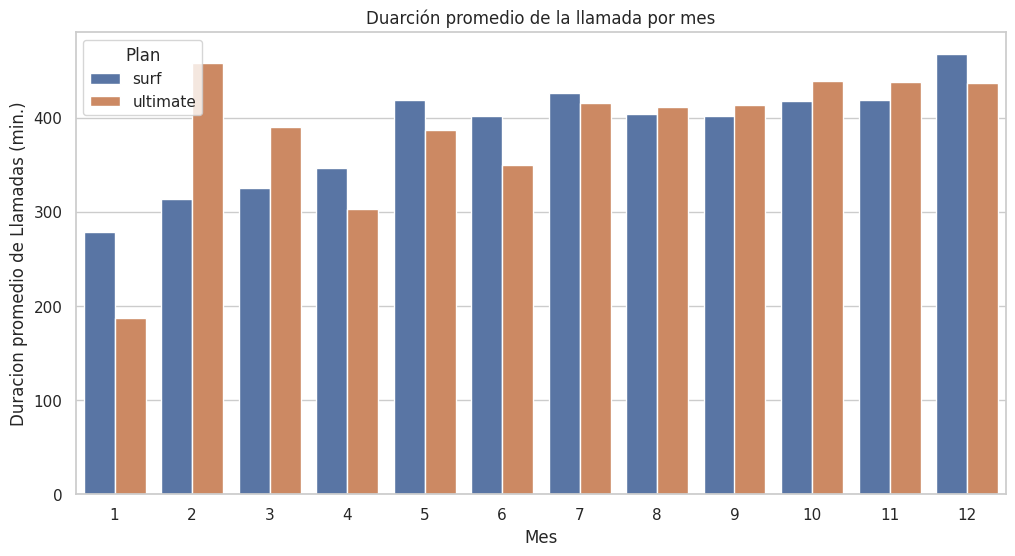

In [101]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
call_duration = df_user_consumo.groupby(["plan" , "call_month"])["total_minutes"].mean().reset_index()

# Renombrar columna
call_duration.columns = ["plan", "mes", "duracion promedio de Llamadas (min.)"]
call_duration


#creacion de gráfico 
sns.set(style="whitegrid")
plt.figure(figsize= (12,6))
sns.barplot(x= "mes", y= "duracion promedio de Llamadas (min.)", hue= "plan", data=call_duration)
plt.title("Duarción promedio de la llamada por mes")
plt.xlabel("Mes")
plt.ylabel("Duracion promedio de Llamadas (min.)")
plt.legend(title="Plan")

plt.show()

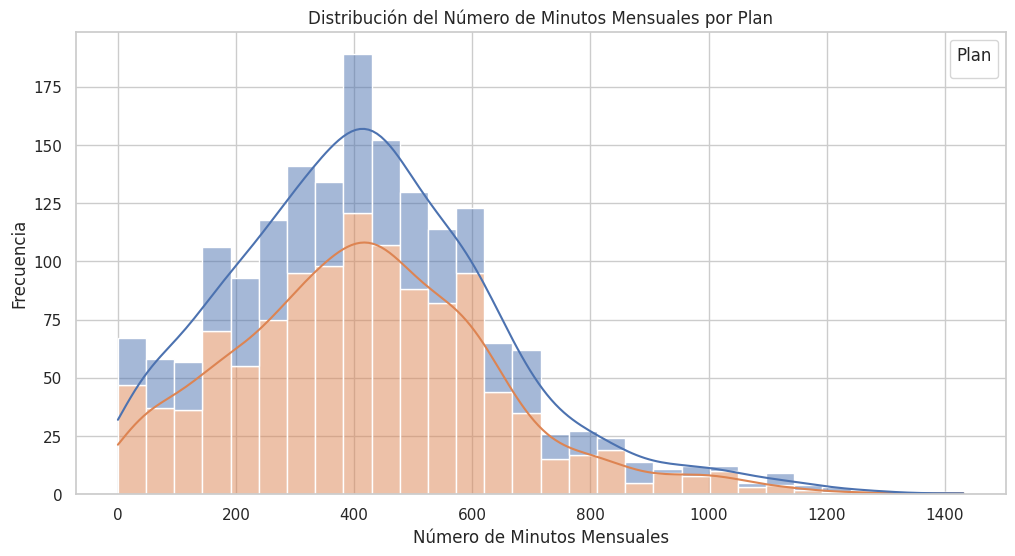

In [105]:
#  histograma
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
hist = sns.histplot(data=df_user_consumo, x='total_minutes', hue='plan', multiple='stack', bins=30, kde=True)

plt.title('Distribución del Número de Minutos Mensuales por Plan')
plt.xlabel('Número de Minutos Mensuales')
plt.ylabel('Frecuencia')
handles, labels = hist.get_legend_handles_labels()
plt.legend(handles=handles, title='Plan')


plt.show()

Se calculó la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.

In [106]:
# Calcula la media y la varianza de la duración mensual de llamadas.
mean_var_duration= df_user_consumo.groupby("plan")["total_minutes"].agg(["mean", "var"]).reset_index()
mean_var_duration.columns = ["Plan", "Media de la Duración (Min.)", "Varianza de la Duración(Min.)"]
mean_var_duration

,Plan,Media de la Duración (Min.),Varianza de la Duración(Min.)
0,surf,420.778483,49492.562612
1,ultimate,417.562159,55607.233145


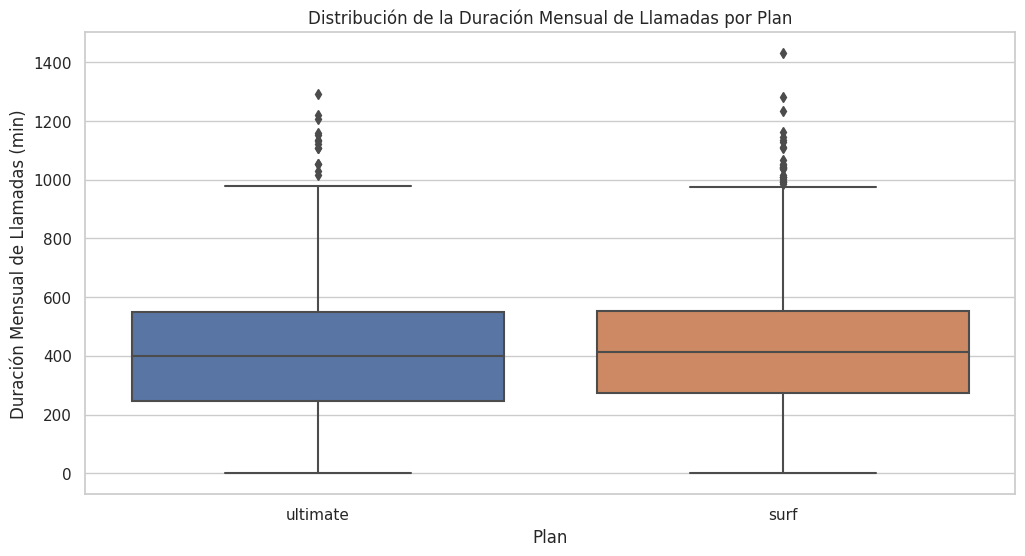

In [107]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(12, 6))
sns.boxplot(x= "plan", y="total_minutes", data= df_user_consumo)
plt.title("Distribución de la Duración Mensual de Llamadas por Plan")
plt.xlabel("Plan")
plt.ylabel("Duración Mensual de Llamadas (min)")

plt.show()

### Mensajes

Text(0, 0.5, 'Número de Mensajes Mensuales')

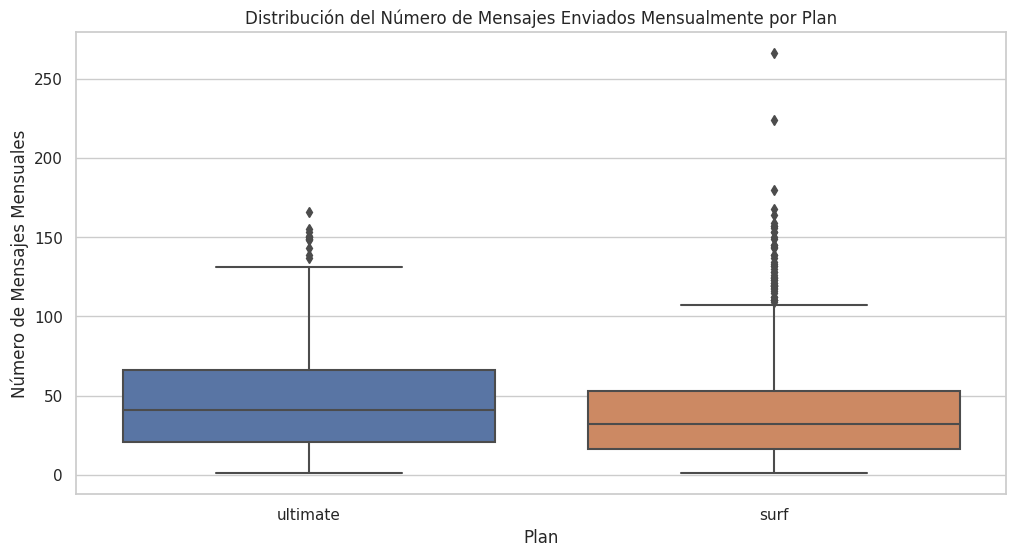

In [108]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
mean_var_messages = df_user_consumo.groupby('plan')['message_count'].agg(['mean', 'var']).reset_index()
mean_var_messages.columns = ['Plan', 'Media de Mensajes', 'Varianza de Mensajes']

# grafico de bigotes
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x='plan', y='message_count', data=df_user_consumo)

plt.title('Distribución del Número de Mensajes Enviados Mensualmente por Plan')
plt.xlabel('Plan')
plt.ylabel('Número de Mensajes Mensuales')

In [ ]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
mean_var_internet = df_user_consumo.groupby('plan')['mb_used'].agg(['mean', 'var']).reset_index()
mean_var_internet.columns = ['Plan', 'Media de MB Consumidos', 'Varianza de MB Consumidos']


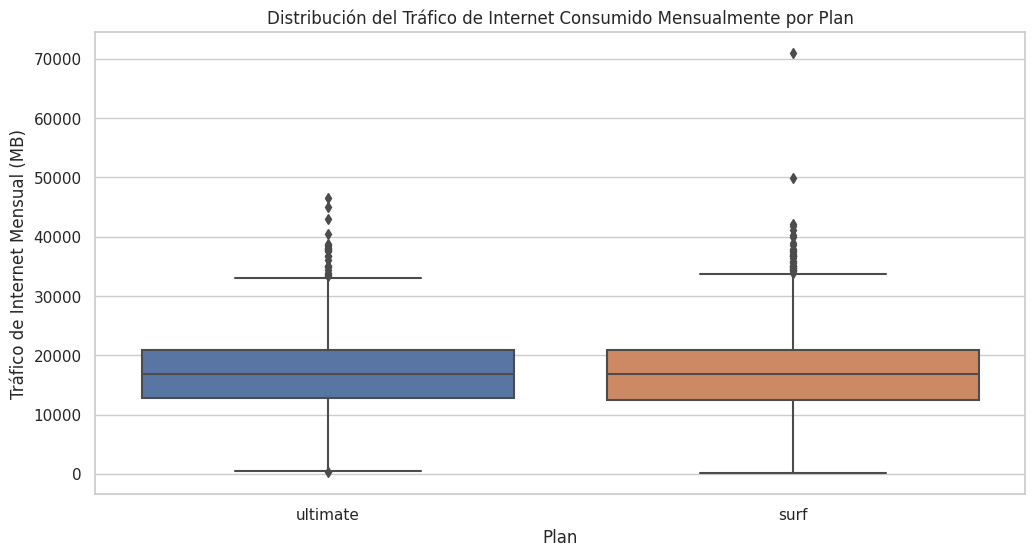

In [109]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x='plan', y='mb_used', data=df_user_consumo)

plt.title('Distribución del Tráfico de Internet Consumido Mensualmente por Plan')
plt.xlabel('Plan')
plt.ylabel('Tráfico de Internet Mensual (MB)')

plt.show()

Media de Mensajes: Los usuarios del plan Ultimate(69.98) envían en promedio más mensajes que los usuarios del plan Surf(33.39).


Varianza de Mensajes: La varianza es mayor en el plan Ultimate, lo que indica una mayor dispersión en el número de mensajes enviados entre los usuarios de este plan.


Distribución: El diagrama de caja muestra que los usuarios del plan Ultimate tienden a enviar significativamente más mensajes mensuales comparado con los usuarios del plan Surf, lo que se observa en la posición de la mediana y la amplitud de los cuartiles.

### Internet

Media de MB Consumidos: Los usuarios del plan Ultimate(17225.05) consumen en promedio un poco más de tráfico de Internet que los usuarios del plan Surf(16235.37), aunque la diferencia no es muy grande.

Varianza de MB Consumidos: La varianza es mayor en el plan Surf, lo que indica una mayor dispersión en el consumo de tráfico de Internet entre los usuarios de este plan.

Distribución: El diagrama de caja muestra que ambos planes tienen una distribución similar en términos de tráfico de Internet consumido, pero hay una ligera tendencia a un mayor consumo en el plan Ultimate.

## Ingreso

In [ ]:
# Calcular estadísticas descriptivas para los ingresos mensuales por plan
mean_var_income = df_user_consumo.groupby('plan')['total_revenue'].agg(['mean', 'var']).reset_index()
mean_var_income.columns = ['Plan', 'Media de Ingresos', 'Varianza de Ingresos']

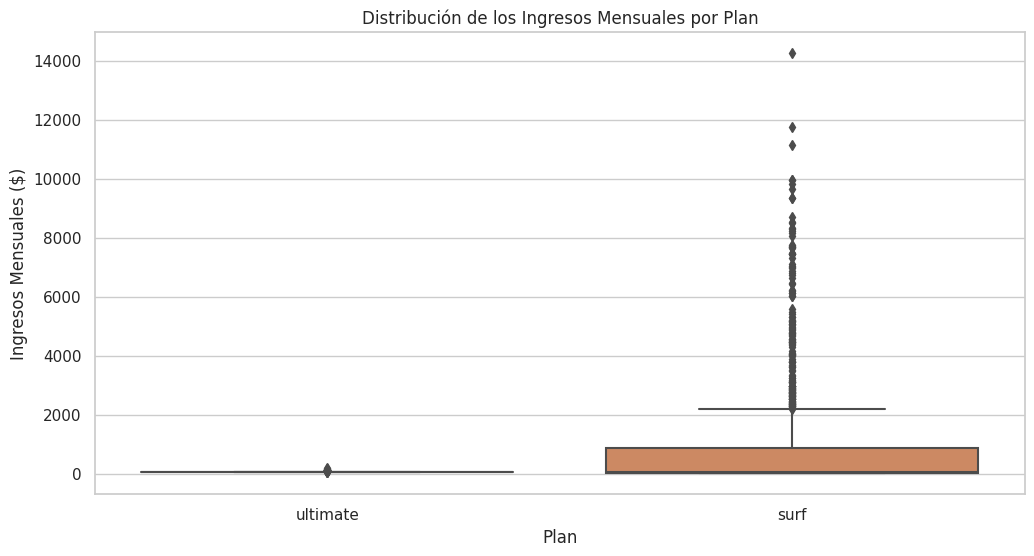

In [110]:
# Gráfica de bigotes
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x='plan', y='total_revenue', data=df_user_consumo)

plt.title('Distribución de los Ingresos Mensuales por Plan')
plt.xlabel('Plan')
plt.ylabel('Ingresos Mensuales ($)')

plt.show()

Plan Surf: El diagrama de caja muestra una distribución con una mayor amplitud entre los cuartiles y posibles valores atípicos en la parte superior, indicando una mayor variabilidad en los ingresos.

Plan Ultimate: El diagrama de caja muestra una distribución más compacta con menos variabilidad y valores atípicos, lo que sugiere ingresos más estables y predecibles.

## Prueba las hipótesis estadísticas

In [112]:
# Prueba las hipótesis
import scipy.stats as stats

# ingresos por plan
ingresos_surf = df_user_consumo[df_user_consumo['plan'] == 'surf']['total_revenue']
ingresos_ultimate = df_user_consumo[df_user_consumo['plan'] == 'ultimate']['total_revenue']

# Realizar la prueba t de Student para dos muestras independientes
t_stat, p_value = stats.ttest_ind(ingresos_surf, ingresos_ultimate, equal_var=False)

print(f'Valor p: {p_value}')

#usare el valor 0.05 por que es el valor predeterminado
alpha = 0.05


if p_value < alpha:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa en los ingresos promedio entre los planes.")
else:
    print("No rechazamos la hipótesis nula: No hay una diferencia significativa en los ingresos promedio entre los planes.")



Valor p: 2.4164354331761518e-48
Rechazamos la hipótesis nula: Hay una diferencia significativa en los ingresos promedio entre los planes.


Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

Se eaboró las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.

In [113]:
# Prueba las hipótesis
import scipy.stats as stats

# Definir las áreas NY-NJ
ny_nj_area = df_user_consumo['city'].str.contains('New York-Newark-Jersey City, NY-NJ-PA MSA')

# Separación por área geográfica
ingresos_ny_nj = df_user_consumo[ny_nj_area]['total_revenue']
ingresos_otras_regiones = df_user_consumo[~ny_nj_area]['total_revenue']

# Realizar la prueba t 
t_stat, p_value = stats.ttest_ind(ingresos_ny_nj, ingresos_otras_regiones, equal_var=False)


print(f'Valor p: {p_value}')

# Determinar el nivel de significancia
alpha = 0.05

# Evaluar el resultado
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa en los ingresos promedio entre los usuarios del área NY-NJ y los usuarios de otras regiones.")
else:
    print("No rechazamos la hipótesis nula: No hay una diferencia significativa en los ingresos promedio entre los usuarios del área NY-NJ y los usuarios de otras regiones.")



Valor p: 0.7351855225789694
No rechazamos la hipótesis nula: No hay una diferencia significativa en los ingresos promedio entre los usuarios del área NY-NJ y los usuarios de otras regiones.


## Conclusión general




Análisis del Comportamiento de los Usuarios

    Duración de Llamadas: No se visualizan diferencias importantes en la duración promedio de las llamadas entre los planes Surf y Ultimate.
    
    Mensajes Enviados: Los usuarios del plan Ultimate envían ligeramente más mensajes que los usuarios del plan Surf.
    
    Tráfico de Internet: Los usuarios del plan Ultimate consumen en promedio más tráfico de Internet, la diferencia no es significativa.

Análisis de Ingresos

    Ingresos Promedios: La media de ingresos para el plan Surf es minimamente superior a la del plan Ultimate, pero los ingresos del plan Ultimate son más consistentes y menos variables.
    
    Varianza de Ingresos: La varianza de los ingresos es significativamente mayor en el plan Surf, indicando una mayor dispersión en los ingresos generados.
    
    Distribución de Ingresos: El diagrama de caja o bigote arroja que los ingresos del plan Surf tienen una mayor variabilidad, mientras que los ingresos del plan Ultimate son más estables.

Pruebas de Hipótesis

    Diferencia en Ingresos por Plan: La prueba t de Student indicó que hay una diferencia significativa en los ingresos promedio entre los planes Ultimate y Surf.
    
    
    Diferencia en Ingresos por Región: La prueba t de Student indicó que no hay una diferencia significativa en los ingresos promedio entre los usuarios del área NY-NJ y los usuarios de otras regiones.

 Recomendaciones

    Evaluar el Plan Ultimate: Aunque el plan Surf tiene ingresos ligeramente más altos, la consistencia y estabilidad de los ingresos del plan Ultimate pueden ser más beneficiosas para la planificación financiera a largo plazo.
    
    
    Optimizar Planes: Considerar ajustes en los planes para equilibrar mejor los costos adicionales y las tarifas básicas, potenciando los beneficios del plan Ultimate, para que los clientes tengan una predilección sobre el plan Ultime.
    
  